/var/folders/29/x077rvnn49d8bx2svybfmrp00000gn/T/ipykernel_22849/3405174402.py:53: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  center_point.set_data(center_x, center_y)


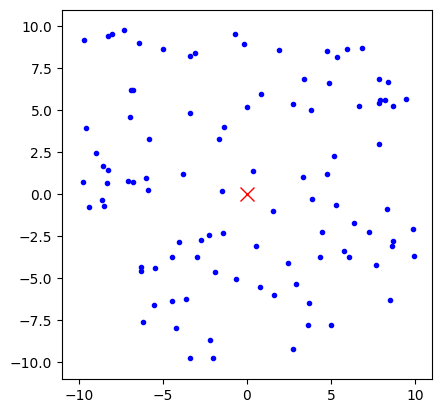

In [1]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 個体数
num_individuals = 100

# 中心点の座標
center_x, center_y = 0, 0

# 移動範囲の半径
radius = 10

# 個体の初期位置
positions = [(random.uniform(-radius, radius), random.uniform(-radius, radius)) for _ in range(num_individuals)]

# シミュレーションのステップ数
num_steps = 100

# グラフの設定
fig, ax = plt.subplots()
ax.set_xlim(-radius - 1, radius + 1)
ax.set_ylim(-radius - 1, radius + 1)
ax.set_aspect('equal')

# プロットオブジェクトの初期化
particles, = ax.plot([], [], 'bo', ms=3)
center_point, = ax.plot([], [], 'rx', ms=10)

# アニメーション関数
def animate(frame):
    # 各個体の移動
    for i in range(num_individuals):
        # ランダムな方向と距離を決める
        angle = random.uniform(0, 2 * math.pi)
        distance = random.uniform(0, 1)
        
        # 新しい位置を計算
        new_x = positions[i][0] + distance * math.cos(angle)
        new_y = positions[i][1] + distance * math.sin(angle)
        
        # 移動範囲を超えないようにする
        if ((new_x - center_x)**2 + (new_y - center_y)**2) > radius**2:
            continue
        
        # 位置を更新
        positions[i] = (new_x, new_y)
    
    # プロットデータを更新
    x_coords, y_coords = zip(*positions)
    particles.set_data(x_coords, y_coords)
    center_point.set_data(center_x, center_y)
    
    return particles, center_point

# アニメーションを作成
ani = animation.FuncAnimation(fig, animate, frames=num_steps, interval=50, blit=True)

plt.show()

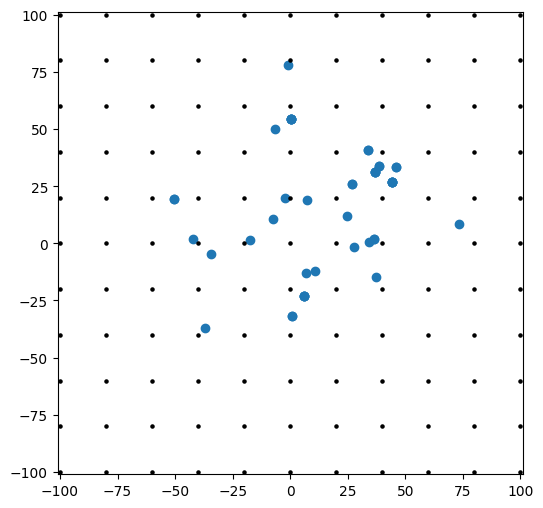

In [3]:
from random_moving import random_moving as rm
from sampling import sample as sp

rm1 = rm(0,0,target_variance=1000,proposal_range=50,start_range=50)
rm1list_x,rm1list_y = rm1.do_random_walk(48)

sp1 = sp(-200, 200, 20, -200, 200, 20, 2)
sp1list_x,sp1list_y = sp1.get_sample(rm1list_x,rm1list_y)

# plot rm1list
from matplotlib import pyplot as plt
radius = 100

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-radius - 1, radius + 1)
ax.set_ylim(-radius - 1, radius + 1)
ax.scatter(rm1list_x, rm1list_y)
sp1.plot_sampling_point(ax)
plt.show()

In [5]:
rm1list_x

[27.91950021536988,
 44.007466522462934,
 44.007466522462934,
 44.007466522462934,
 44.007466522462934,
 44.007466522462934,
 73.43669430054851,
 36.285572044275604,
 36.285572044275604,
 6.043153093216812,
 6.043153093216812,
 6.043153093216812,
 6.043153093216812,
 -2.3408853110151746,
 45.85139100538251,
 45.85139100538251,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 33.96272414883423,
 33.96272414883423,
 7.387212587838732,
 24.7645697556368,
 6.886039632411865,
 34.1426189003696,
 37.22117674159915,
 36.88625259236469,
 36.88625259236469,
 36.88625259236469,
 36.88625259236469,
 26.851404057244892,
 26.851404057244892,
 10.853540774249943,
 38.556536988767185,
 38.556536988767185,
 -0.7484789239471752,
 -6.586917253667949,
 -50.428329188392546,
 -50.428329188392546,
 -42.03509277531359,
 -7.660242182489718,
 -37.18706151006117,
 0.807553146171486,
 0.807553146171486,
 -17.614317145145435,
 -34.3591323959461]

In [4]:
sp1list_x

[0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,
 0.310943583876373,


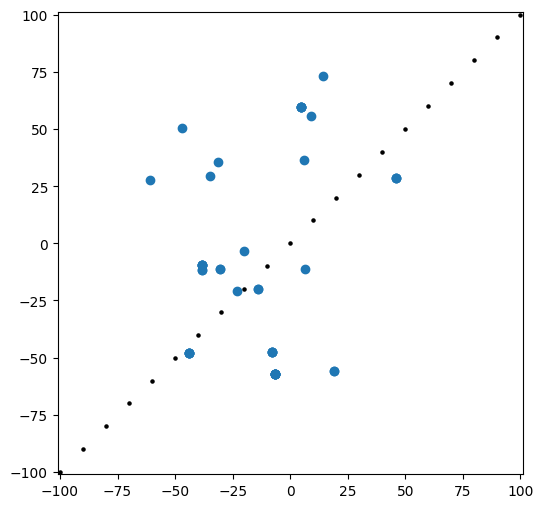

In [2]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-radius - 1, radius + 1)
ax.set_ylim(-radius - 1, radius + 1)
ax.scatter(rm1list_x, rm1list_y)
sp1.plot_sampling_point(ax)
plt.show()

In [3]:
rm1list_x

[-26.695162915032345,
 -2.2604894069261583,
 35.350401569123804,
 35.350401569123804,
 35.350401569123804,
 -14.178652858921879,
 -28.40929844949705,
 -53.525449655964714,
 -53.525449655964714,
 -81.45909327525149,
 -81.45909327525149,
 -81.45909327525149,
 -59.50213786010784,
 -41.37806363320249,
 -15.835953746084428,
 27.99845453871734,
 27.99845453871734,
 -6.37943284520513,
 -47.698754584126306,
 -5.383714323001641,
 -5.383714323001641,
 -28.34461951127005,
 -5.191544834024821,
 -31.47182666900521,
 -15.408953866525266,
 -15.408953866525266,
 -15.408953866525266,
 17.6432538911602,
 2.237739830787284,
 3.51141483467093,
 22.125490246551507,
 32.32469861527042,
 19.319291973592655,
 67.60935505825009,
 58.06915487180311,
 58.06915487180311,
 58.06915487180311,
 58.06915487180311,
 58.06915487180311,
 29.23703967379647,
 29.23703967379647,
 30.525257930128657,
 30.525257930128657,
 30.525257930128657,
 36.93525606611868,
 36.93525606611868,
 45.480544978210645,
 45.480544978210645]